# [AIFFEL_Going Deeper_4] 인물사진을 만들어 보자

## 프로젝트 내용
인물 모드 사진을 만들고, 문제점을 찾아 개선 방안 도출하기

## 목차
#### 1. 인물 모드 사진 만들기
**- Step 1. 필요한 라이브러리 불러오기**    
**- Step 2. 인물모드 직접 구현하기_최소 3장 이상의 인물모드 사진 만들기**        
2-1. 1번째 사진_사진 불러오기      
2-2. PixelLib에서 제공해 주는 모델 다운로드     
2-3. 세그멘테이션 모델 객체 생성     
2-4. 모델에 이미지 입력해 Segmentation(이미지 분할) 진행     
2-5. PASCAL VOC 데이터의 라벨 종류 확인     
2-6. colormap 만들기     
2-7. seg_color로 이루어진 마스크 만들기     
2-8. 원본 이미지와 겹쳐서 확인하기(cv2.addWeighted() 이용)     
2-9. 배경 흐리게 만들기(blur() 이용)     
2-10. 배경 영상과 사람 영상을 합치기     
**- Step 3. 인물이 주인공이 아닌, 다른 대상에 대한 아웃포커싱 사진 만들기**                


3-1. 파일명을 리스트 형식으로 변수에 할당     
3-2. txt_file 리스트 안 파일들의 문자열을 한 줄씩 raw_copus에 리스트로 담기           
**- Step 4. 데이터 정제**          
4-1. preprocess_sentence()로 소문자, 공백, 특수문자 정리     
4-2. tokenizer(단어 사전) 만들기         
4-3. train data, target data(x_train, y_train) 생성         
4-4. 검증용 데이터(validation data) 나누기    
Trial 1. src_input과 tgt_input이 numpy.ndarray이고 2차원이고, tensor로 바꾸고 train/valid data로 나누기     
Trial 2. src_input과 tgt_input을 tensor로 변환하지 않고 train/valid data로 나누기    
4-5. 데이터셋 객체 생성    
**- Step 5. 모델 만들기**         
5-1. 모델 학습       
Trial 1. 데이터셋 객체를 만들고 훈련용/검증용 데이터를 나누고 모델학습을 함(오류)    
Trial 2. 데이터를 훈련용과 검증용으로 나누고, 데이터셋 객체를 만듦    
Trial 3. 저장하는 모델 포맷을 save_format='tf'로 바꾸어 다시 훈련     
Trial 4. embedding_size = 512, hidden_size = 2048, epoch = 30, batch size=32      
Trial 5. LSTM 층 1개 추가, embedding_size = 512, hidden_size = 2048, epoch = 30, batch size=32    
**-Step 6. 문장 생성함수 만들고 문장 생성하기** 
#### 2. 만든 인물 모드 사진의 문제점 찾기
#### 3. 개선 방안 고민 및 도출 



#### 2. 결론
#### 3. 루브릭 관련 고려한 점
4. 탐구 및 시도 모음
#### 4. 회고      
#### 5. References     

## 글씨 색 표시
### <span style = "color:orange;">- 노랑: 질문! or 짚고가자!</span>    
### <span style = "color:red;">- 빨강: 중요 or 특이사항</span>

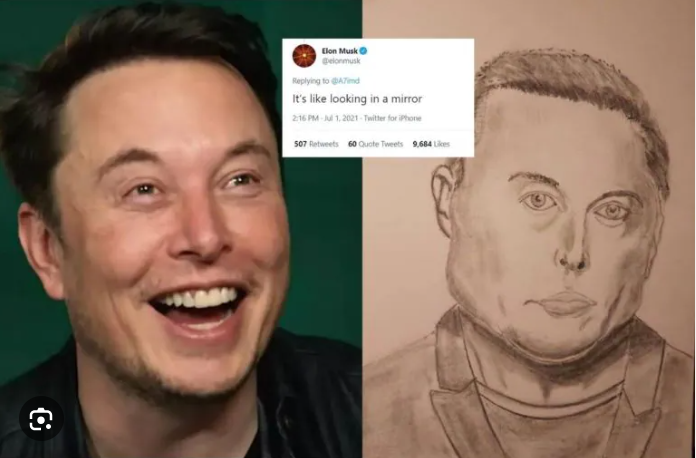

In [34]:
Image("[GD_4_Portrait] images/11.PNG")

# 1. 인물 모드 사진 만들기

## Step 1. 필요한 라이브러리 불러오기

In [1]:
import os
import urllib
import cv2 
import numpy as np
import pixellib

from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
from importlib.metadata import version

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


In [2]:
!pip install IPython  
from IPython.display import Image

### <span style = "color:orange;">라이브러리 공부!</span>

  
<span style = "color:red;">import os</span>    
os 모듈은 Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게 해준다.    
예를 들어, 파이썬을 이용해 파일을 복사하거나 디렉터리를 생성하고 특정 디렉터리 내의 파일 목록을 구하고자 할 때 사용한다.    
https://wikidocs.net/3141


<span style = "color:red;">import urllib</span>      
urllib은 URL 처리에 관련된 모듈을 모아 놓은 패키지    
https://dojang.io/mod/page/view.php?id=2442


<span style = "color:red;">import cv2</span>     
OpenCV라이브러리    
컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리     


<span style = "color:red;">import pixellib</span>     
Pixellib는 파이썬 라이브러리이다.    
픽셀 수준의 image segmentation(이미지 분할)과 object detection(객체 탐색)을 할 수 있게 하는 고수준의 API를 제공한다.    
TensorFlow 프레임워크 위에서 작동하며, 더 정확하고 효과적인 결과를 얻기 위해 pre-trained 모델을 활용한다. 

Pixellib is a Python library that provides a high-level API for performing pixel-level image segmentation and object detection tasks.     
It is built on top of the TensorFlow framework and utilizes pre-trained models to achieve accurate and efficient results.
[ChatGPT]
          

<span style = "color:red;">from importlib.metadata import version</span>

**importlib**     
사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리    
사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있다.


**importlib.metadata**    
설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리      
importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인
[출처_노드]

## Step 2. 인물모드 직접 구현하기_최소 3장 이상의 인물모드 사진 만들기

## Step 2-1. 1번째 사진_사진 불러오기

(563, 1000, 3)


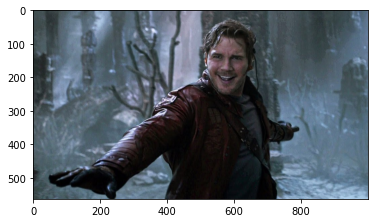

In [8]:
img_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_4_Portrait] images/01.jpg'  
img_orig = cv2.imread(img_path) 
print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## Step 2-2. PixelLib에서 제공해 주는 모델 다운로드

In [9]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델 url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드 시작
urllib.request.urlretrieve(model_url, model_file) 

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f74b1060c40>)

### <span style = "color:orange;">함수 공부!</span>

<span style = "color:red;">os.getenv()</span>           
os 모듈에 있는 getenv() 함수를 이용해 읽고 싶은 파일의 경로를 변수에 저장할 수 있다.     
-> 이미지 파일의 경로를 이용하여 이미지 파일을 읽음    
환경 변수x의 값을 포함하는 문자열 변수를 반환한다.     
예) model_dir 에 "/aiffel/human_segmentation/models" 저장    

<span style = "color:red;">os.path.join(a, b)</span>      
경로를 병합하여 새 경로 생성     
예) model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장    

<span style = "color:red;">cv2.imread(경로)</span>      
경로에 해당하는 이미지 파일을 읽어서 변수에 저장     

<span style = "color:red;">urllib.request.urlretrieve(model_url, model_file) </span>      
urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해    
model_url에 있는 파일을 다운로드 해 model_file 파일명으로 저장    
[출처_노드]

## Step 2-3. 세그멘테이션 모델 객체 생성

In [10]:
model = semantic_segmentation() 
#PixelLib 라이브러리에서 클래스를 가져와 semantic segmentation을 수행하는 클래스 인스턴스 만듦

model.load_pascalvoc_model(model_file) 
# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수 호출

## Step 2-4. 모델에 이미지 입력해 Segmentation(이미지 분할) 진행

In [11]:
segvalues, output = model.segmentAsPascalvoc(img_path)

# segmentAsPascalvoc()함수를 호출하여 입력된 이미지를 분할
# segvalus, output으로 나누어 분할 출력의 배열을 가져옴
# 분할은 pacalvoc 데이터로 학습된 모델을 이용

### <span style = "color:red;">segvalues, output을 각각 출력해보면</span>      
**segvalues**는     
segmentAsPascalvoc() 함수를 호출해 이미지를 분할한 뒤 결과값 중 배열값을 출력한 것    
segvalues는 class_ids와 masks으로 구성되어 있다.     
class_ids를 통해서는 Pascal Voc의 라벨데이터와 비교해서 분할한 이미지에 어떤 라벨들이 담겨있는지 알 수 있다.    

**output**에는 segmentation된 결과가 각각 다른 색상을 의미하는 숫자로 담겨져 있다.
[출처_노드]

In [12]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [13]:
output

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [21]:
output.shape

(563, 1000, 3)

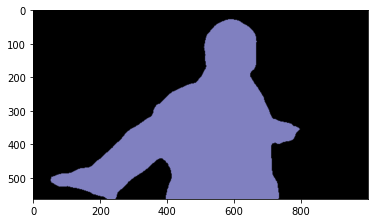

In [15]:
# output에는 segmentation된 결과가 각각 다른 색상을 의미하는 숫자로 담겨져 있다.
# 이를 matplotlib을 이용해 출력

plt.imshow(output)
plt.show()

## Step 2-5. PASCAL VOC 데이터의 라벨 종류 확인

In [14]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

### <span style = "color:red;">LABEL_NAMES를 자세히 보면</span> 
background를 제외하면 20개의 클래스가 있다.         
인덱스 번호 20의 의미는 tv(0부터 시작하므로)    

input으로 넣은 이미지의 사람(person) 라벨은 15에 해당    
[출처_노드]

In [16]:
#segvalues 안의 class_ids 값을 통해 pacalvoc에 담겨있는 라벨 출력

for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


## Step 2-6. colormap 만들기

In [17]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 colormap 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

### <span style = "color:red;">colormap을 보고</span> 
PixelLib에 따르면 각 라벨별 해당하는 색은 위와 같다.    
사람을 나타내는 색상을 알고 싶은 경우에는 인덱스 번호를 이용하면 된다.    
person은 LABEL_NAMES에서 인덱스 번호 15에 해당하므로, colormap[15]로 사람에 해당하는 컬러맵의 색상값을 알 수 있다.    

**output 이미지가 BGR 순서로 되어있고, colormap은 RGB 순서**    
코드에 적용할 때에는 colormap에서 나온 RGB 순서를 BGR 순서로 수정해야 한다.

In [18]:
colormap[15] 

array([192, 128, 128])

In [19]:
seg_color = (128,128,192) 

### <span style = "color:orange;">seg_color를 설정할 때</span> 
튜플처럼 정해주면 되는건가?       
colormap[15]의 출력은 array형태로 [ ] 대괄호 안에 숫자들이 있는데, 형태가 같지 않은데 그래도 괜찮은가 하는 궁금증

## Step 2-7. seg_color로 이루어진 마스크 만들기

(563, 1000)


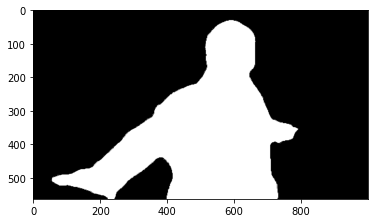

In [22]:
seg_map = np.all(output==seg_color, axis=-1) 
# output의 픽셀별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)
# seg_color 색상값 = person 색상값 -> 사람이 있는 위치를 제외하고는 gray로 출력 의미

print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray') # cmap 값을 변경하면 다른 색상으로 확인 가능
plt.show()

### <span style = "color:orange;">np.all()</span> 
numpy.all(a, axis=None, out=None, keepdims=<no value>, *, where=<no value>)

Test whether all array elements along a given axis evaluate to True.    
배열의 모든 데이터가 조건과 맞으면 True, 하나라도 다르면 False     
        
배열의 같은 위치에 있는 요소간의 비교    
배열의 shape이 같아야 함    
비교연산자 ==, >, <로 배열 요소 비교     
  
https://numpy.org/doc/stable/reference/generated/numpy.all.html     
https://nov19.tistory.com/106    

### <span style = "color:orange;">seg_map = np.all(output==seg_color, axis=-1)에서</span> 
axis=-1의 의미는??

### <span style = "color:red;">output과 seg_map의 shape</span> 
output의 shape은 (563, 1000, 3)이었음, 3채널이었음    
np.all()을 하고 난 seg_map의 shape은 (563, 1000)임    

물체가 있는 위치는 1(True), 그 외에는 0(False)인 배열이 됨     
예)     
[     
[ 0 1 1 0 0 0 1 1 0 ],     
[ 1 1 1 1 0 1 1 1 1 ],     
[ 0 1 1 1 1 1 1 1 0 ],     
[ 0 0 1 1 1 1 1 0 0 ],     
[ 0 0 0 1 1 1 0 0 0 ]     
]

## Step 2-8. 원본 이미지와 겹쳐서 확인하기(cv2.addWeighted() 이용)

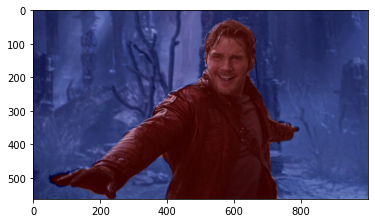

In [26]:
# 주석 출처_노드
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력

img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꾸어 줌
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꾸어 줌
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐보기
# 0.6과 0.4는 두 이미지를 섞는 비율
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## Step 2-9. 배경 흐리게 만들기(blur() 이용)

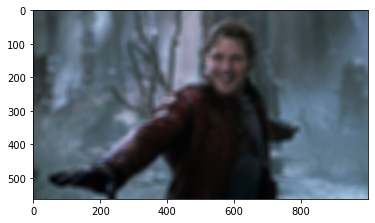

In [27]:
# (20,20)은 blurring kernel size 의미
img_orig_blur = cv2.blur(img_orig, (20,20))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

## Step 2-9. 흐려진 이미지에서 배경만 추출(Segmentation한 mask 이용) 

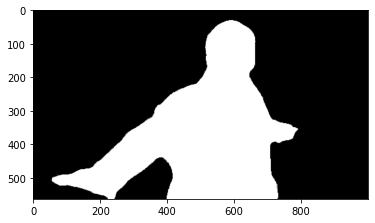

In [28]:
# img_mask 활용
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

plt.imshow(img_mask_color)
plt.show()

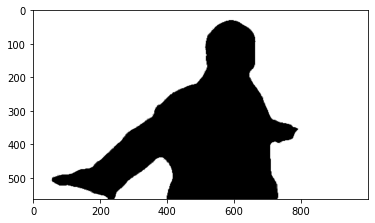

In [29]:
# 반전하기

img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)
plt.show()

### <span style = "color:orange;">함수 공부!</span>

<span style = "color:red;">plt.imshow()</span>                
저장된 데이터를 이미지의 형식으로 표시     

<span style = "color:red;">cv2.cvtColor(입력 이미지, 색상 변환 코드)</span>      
입력 이미지의 색상 채널을 변경     

<span style = "color:red;">cv2.COLOR_BGR2RGB</span>      
BGR 형식을 RGB 형식으로 변경(원본은 BGR 순서로 픽셀을 읽으므로 이미지 색상 채널 변경 필요)  

<span style = "color:red;">cv2.bitwise_not()</span>     
이미지가 반전된다. 배경이 0 사람이 255였으나     
연산을 하고 나면 배경은 255 사람은 0     

<span style = "color:red;">cv2.bitwise_and()</span>       
0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 배경만 있는 영상을 얻을 수 있다.    
사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 된다. 사람이 사라지고 배경만 남는다.     
https://velog.io/@dldndyd01/OpenCV-bitwiseand-or-xor-not-%EA%B8%B0%EB%8A%A5-%EC%A0%95%EB%A6%AC-RGB-Image

[출처_노드]

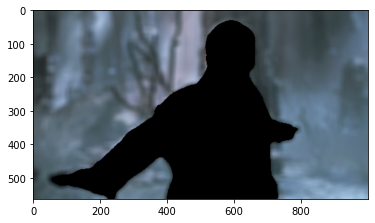

In [30]:
# 배경만 남기기
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

## Step 2-10. 배경 영상과 사람 영상을 합치기

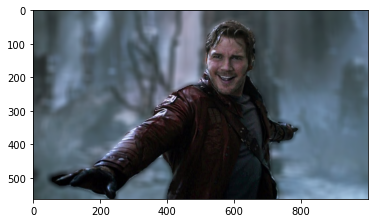

In [31]:
img_concat = np.where(img_mask_color==0, img_bg_blur, img_orig)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### <span style = "color:orange;">np.where(조건, 참일 때, 거짓일 때)</span>     
numpy.where(condition, [x, y, ]/)

Return elements chosen from x or y depending on condition.    
조건을 만족하는 인덱스 반환

예)       
a = np.arange(10)       
a     
-> array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])     

np.where(a < 5, a, 10*a)    
-> array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

## Step 2-11. 2번째 사진

(899, 1600, 3)


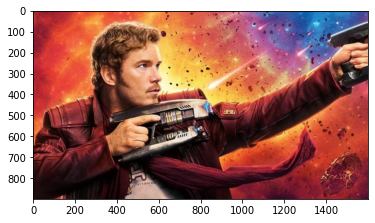

In [35]:
img_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_4_Portrait] images/02.jpg'  
img_orig = cv2.imread(img_path) 
print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
urllib.request.urlretrieve(model_url, model_file) 

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f74b00be730>)

In [37]:
model = semantic_segmentation() 
model.load_pascalvoc_model(model_file) 

In [38]:
segvalues, output = model.segmentAsPascalvoc(img_path)

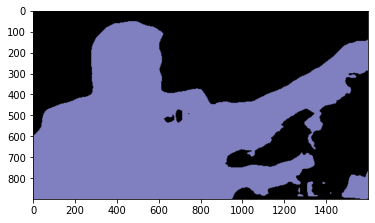

In [39]:
plt.imshow(output)
plt.show()

In [40]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bottle
person


In [42]:
seg_color = (128,128,192) 

(899, 1600)


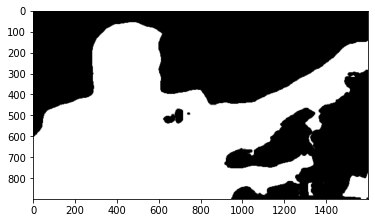

In [43]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

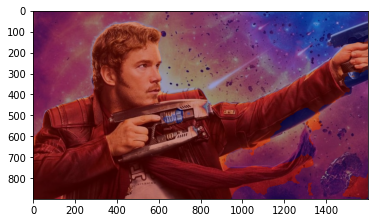

In [44]:
img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

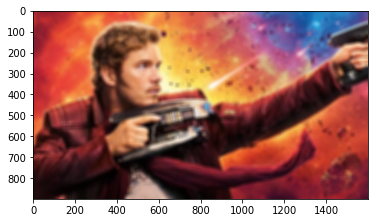

In [45]:
img_orig_blur = cv2.blur(img_orig, (20,20))
  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

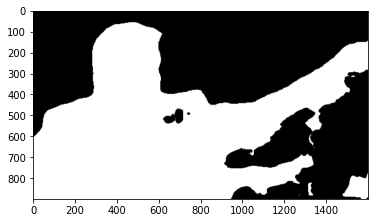

In [48]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

plt.imshow(img_mask_color)
plt.show()

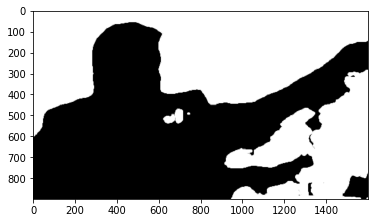

In [49]:
img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)
plt.show()

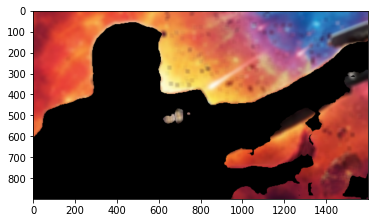

In [50]:
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

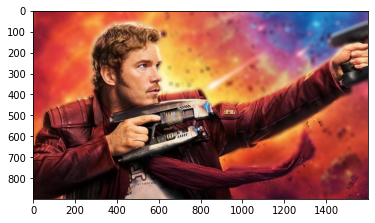

In [51]:
img_concat = np.where(img_mask_color==0, img_bg_blur, img_orig)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## Step 2-12. 3번째 사진

(720, 1280, 3)


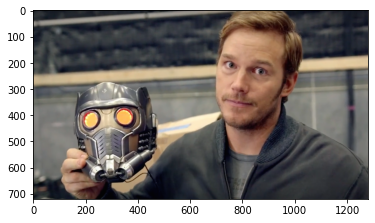

In [52]:
img_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_4_Portrait] images/03.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [53]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file) 

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f74b04e97f0>)

In [54]:
model = semantic_segmentation() 
model.load_pascalvoc_model(model_file) 

In [55]:
segvalues, output = model.segmentAsPascalvoc(img_path)

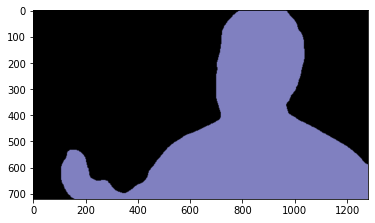

In [57]:
plt.imshow(output)
plt.show()

In [58]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [60]:
seg_color = (128,128,192) 

(720, 1280)


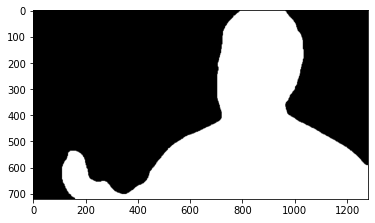

In [61]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

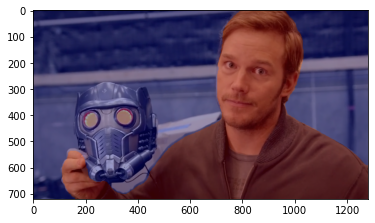

In [62]:
img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

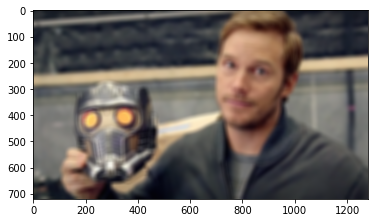

In [63]:
img_orig_blur = cv2.blur(img_orig, (20,20))
  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

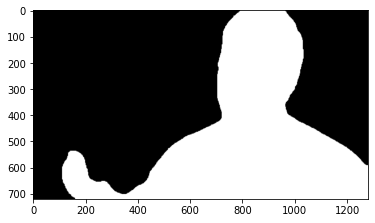

In [64]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

plt.imshow(img_mask_color)
plt.show()

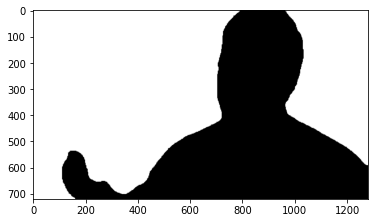

In [65]:
img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)
plt.show()

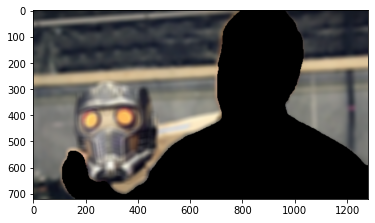

In [66]:
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

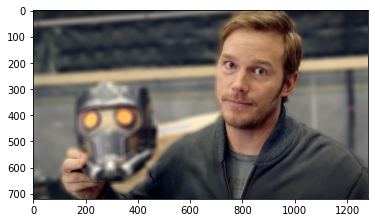

In [67]:
img_concat = np.where(img_mask_color==0, img_bg_blur, img_orig)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## Step 3. 인물이 주인공이 아닌, 다른 대상에 대한 아웃포커싱 사진 만들기

## Step 3-1. 4번째 사진_마네킹

(1050, 1400, 3)


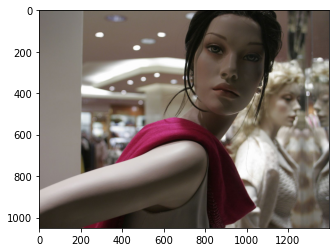

In [68]:
img_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_4_Portrait] images/04.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### <span style = "color:red;">매 사진마다 모델을 불러왔는데, 불러오지 않고 해봐도 되지 않을까? 한 번 해 보자</span>

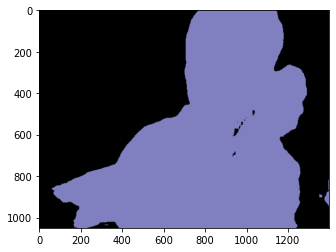

In [69]:
segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

In [70]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])
    
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] 
seg_color = (128,128,192) 

background
person


(1050, 1400)


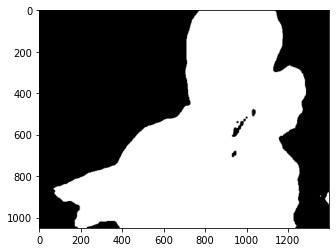

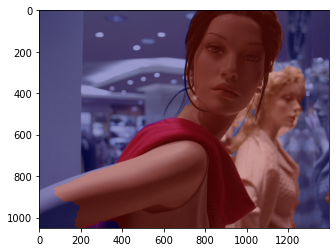

In [71]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

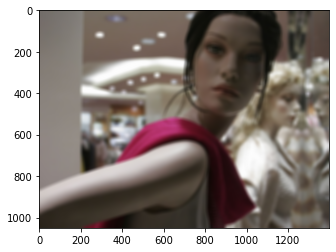

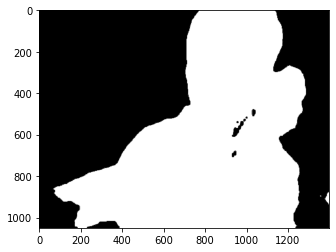

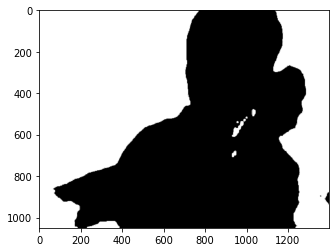

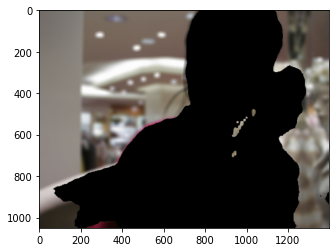

In [72]:
img_orig_blur = cv2.blur(img_orig, (20,20))
  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

plt.imshow(img_mask_color)
plt.show()

img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)
plt.show()

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

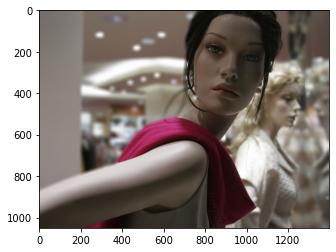

In [73]:
img_concat = np.where(img_mask_color==0, img_bg_blur, img_orig)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### <span style = "color:red;">마네킹도 사람으로 인식, 마네킹 두 개를 모두 사람으로 인식</span>

## Step 3-2. 5번째 사진_마네킹 다수, 사람 다수

(462, 694, 3)


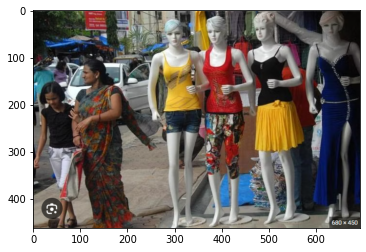

In [74]:
img_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_4_Portrait] images/05.PNG'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

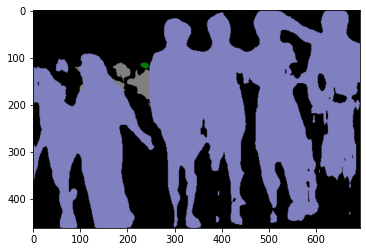

In [75]:
segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

In [76]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])
    
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력
seg_color = (128,128,192) 

background
bicycle
car
person


### <span style = "color:red;">bucycle과 car도 인식했음을 알 수 있다.</span>

(462, 694)


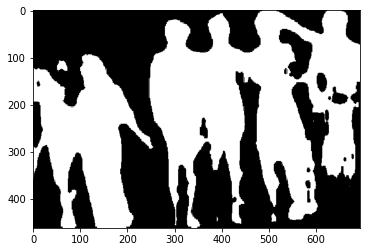

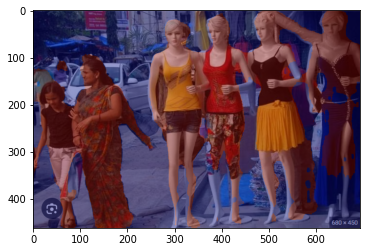

In [77]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

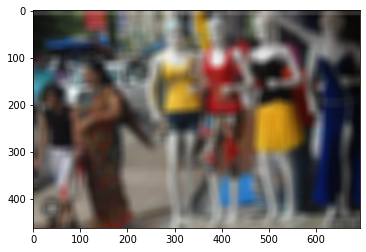

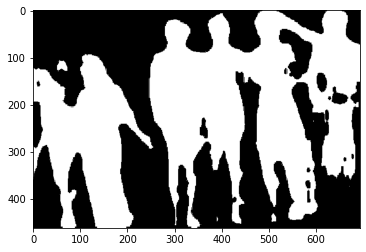

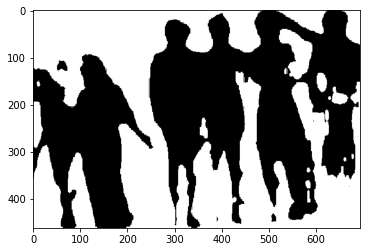

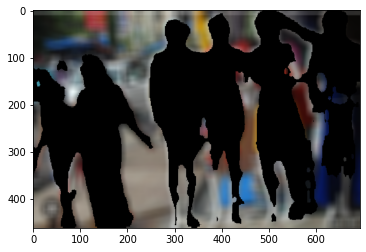

In [78]:
img_orig_blur = cv2.blur(img_orig, (20,20))
  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

plt.imshow(img_mask_color)
plt.show()

img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)
plt.show()

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

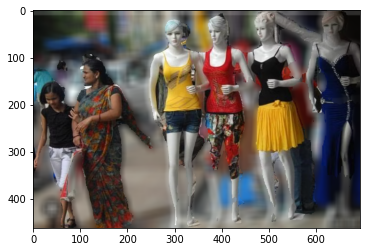

In [79]:
img_concat = np.where(img_mask_color==0, img_bg_blur, img_orig)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### <span style = "color:red;">역시 마네킹을 사람으로 분류했으며, 마네킹의 다리와 일부 옷이 제대로 인식되지 않았다.</span>

## Step 3-3. 6번째 사진_마네킹 하나, 사람 한 명

(998, 1500, 3)


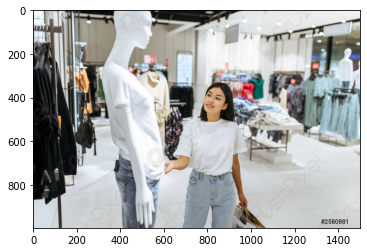

In [80]:
img_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_4_Portrait] images/06.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

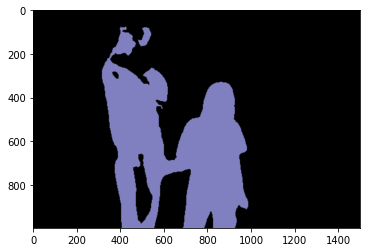

In [81]:
segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

(998, 1500)


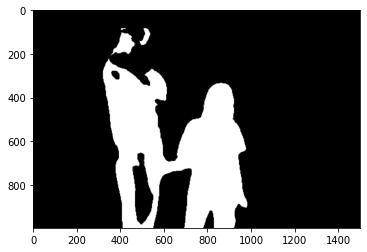

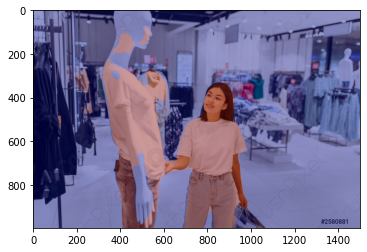

In [82]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

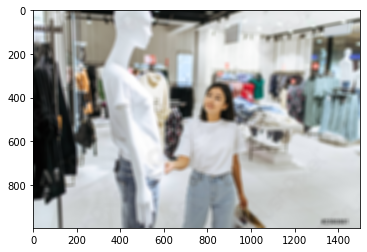

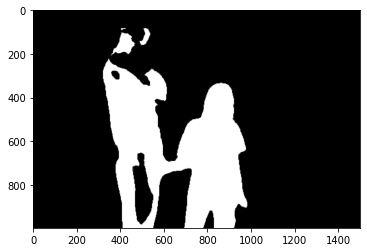

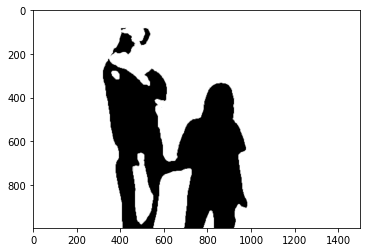

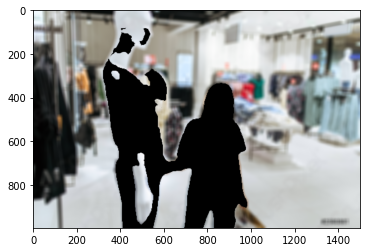

In [83]:
img_orig_blur = cv2.blur(img_orig, (20,20))
  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

plt.imshow(img_mask_color)
plt.show()

img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)
plt.show()

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

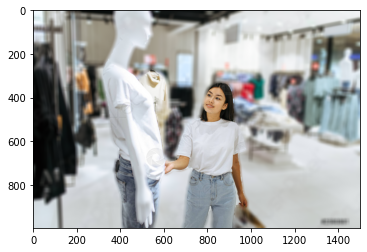

In [84]:
img_concat = np.where(img_mask_color==0, img_bg_blur, img_orig)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### <span style = "color:red;">역시 마네킹을 사람으로 분류, 마네킹의 얼굴만 일부 인식, 뒤에 걸려있는 옷도 같이 인식함</span>

## Step 3-4. 7번째 사진_동물(소) 그림 반 사진 반

In [85]:
#pascalvoc 데이터의 라벨 종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

(720, 1280, 3)


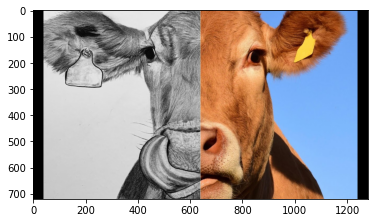

In [86]:
img_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_4_Portrait] images/07.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

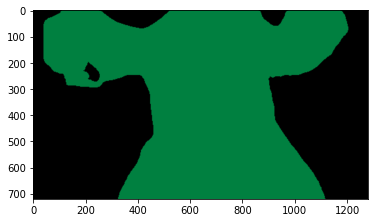

In [87]:
segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

In [89]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])
    
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
colormap[10] 
seg_color = (0,128,64) 

background
cow


### <span style = "color:red;">background와 cow를 구분한 것을 알 수 있다. 또 소는 사람과 달리 colormap의 값이 다르므로 바꾸어 줌</span>

(720, 1280)


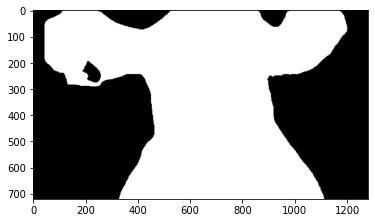

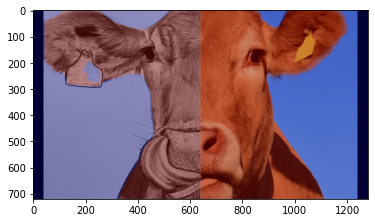

In [90]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

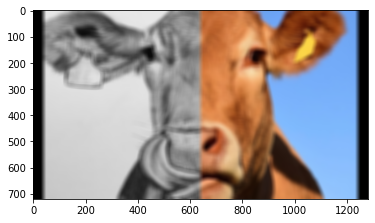

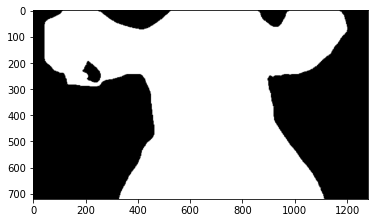

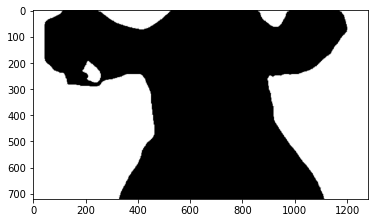

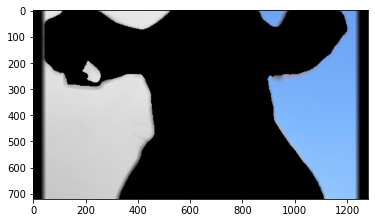

In [91]:
img_orig_blur = cv2.blur(img_orig, (20,20))
  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

plt.imshow(img_mask_color)
plt.show()

img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)
plt.show()

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

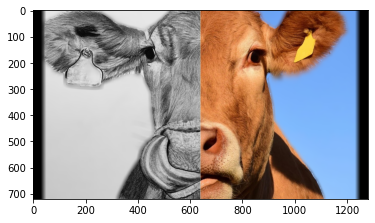

In [108]:
img_concat = np.where(img_mask_color==0, img_bg_blur, img_orig)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### <span style = "color:red;">소를 잘 분리하였는데, 그림으로 그린 소도 소로 분리한게 신기!</span>

## Step 3-5. 8번째 사진_동물(소) 그림으로 그린 전체 소 하나, 실제 소 전체 사진 하나

(720, 1280, 3)


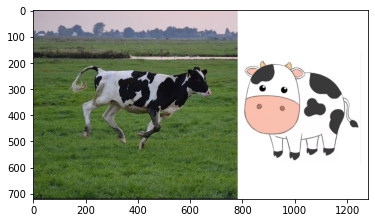

In [92]:
img_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_4_Portrait] images/08.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

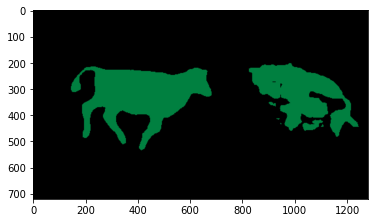

In [93]:
segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

In [95]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])
    
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
colormap[10] 
seg_color = (0,128,64) 

background
cow


(720, 1280)


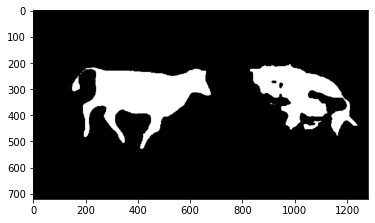

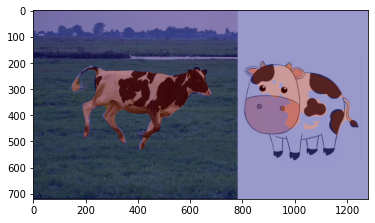

In [96]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

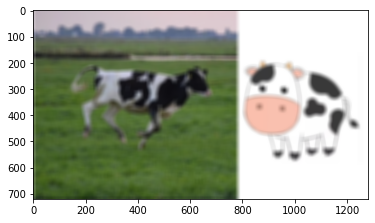

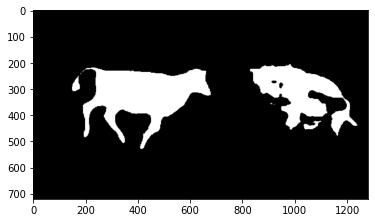

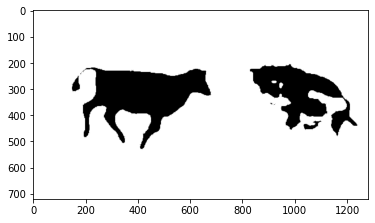

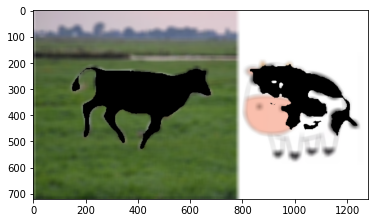

In [97]:
img_orig_blur = cv2.blur(img_orig, (20,20))
  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

plt.imshow(img_mask_color)
plt.show()

img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)
plt.show()

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

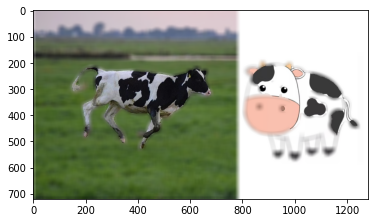

In [98]:
img_concat = np.where(img_mask_color==0, img_bg_blur, img_orig)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### <span style = "color:red;">실제 소는 잘 분리하였으나, 그림 소의 경우 무늬있는 곳만 분리한 것처럼 보임</span>

소를 분리할 때, 무늬가 분리하는 데의 주요 특징이 되는 걸까?

## Step 3-6. 9번째 사진_동물(소) 다른 소 모습_그림으로 그린 전체 소 하나, 실제 소 전체 사진 하나

(2100, 3360, 3)


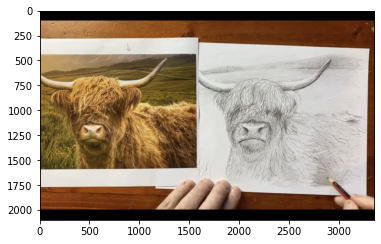

In [99]:
img_path = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_4_Portrait] images/09.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

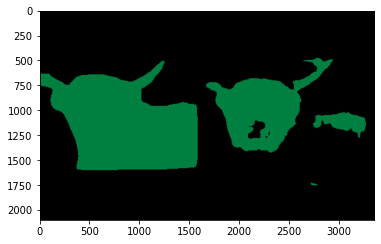

In [100]:
segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

In [101]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])
    
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
colormap[10] 
seg_color = (0,128,64) 

background
cow


(2100, 3360)


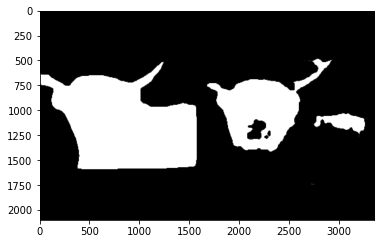

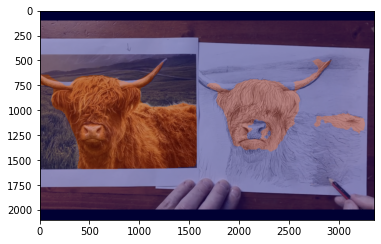

In [102]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

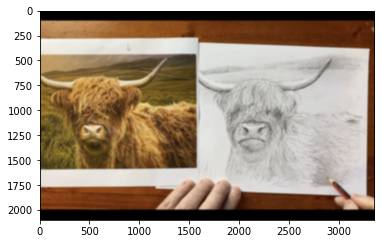

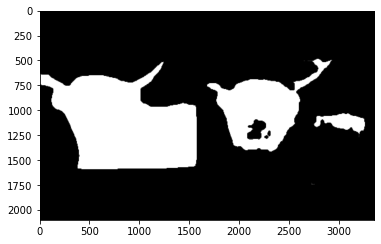

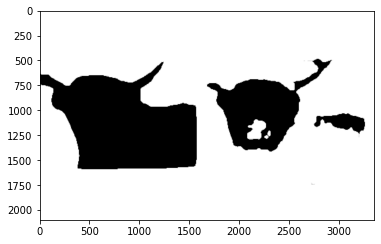

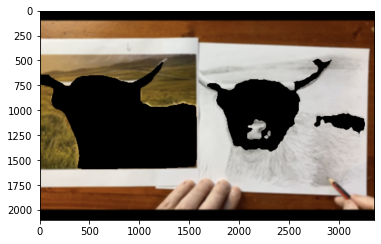

In [103]:
img_orig_blur = cv2.blur(img_orig, (20,20))
  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

plt.imshow(img_mask_color)
plt.show()

img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)
plt.show()

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

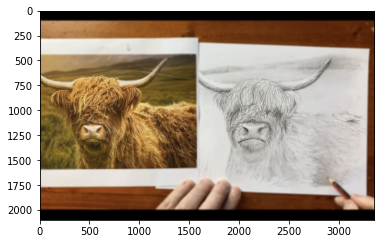

In [104]:
img_concat = np.where(img_mask_color==0, img_bg_blur, img_orig)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### <span style = "color:red;">이 사진의 경우에도 실제 소는 잘 분리하였으나, 그림 소의 경우 무늬있는 곳만 분리한 것처럼 보임</span>

아무래도 그림 소는 위 이미지의 경우 연필로 그린 부분이 흐려 구분을 잘 못한 것일 수도 있다.       
또는 이 모델이 소의 실제 사진으로 학습을 더 많이 했기 때문에 그림으로 그린 소를 분리하는데에 익숙하지 않을 수도 있다는 추측을 해본다.

## Step 4. 배경사진을 다른 이미지로 배경 합성하기

## Step 4-1. 10번째_동물 소와 다른 배경 합치기

(638, 960, 3)


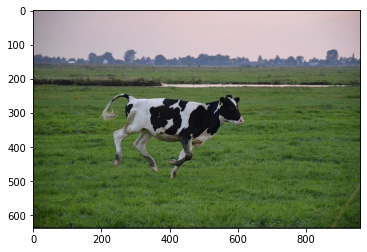

In [2]:
img_path_cow = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_4_Portrait] images/image5.png'  
img_orig_cow = cv2.imread(img_path_cow) 

print(img_orig_cow.shape)

plt.imshow(cv2.cvtColor(img_orig_cow, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

urllib.request.urlretrieve(model_url, model_file) 

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f24efb1ffa0>)

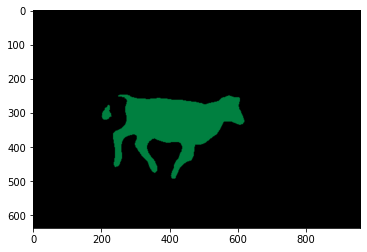

In [4]:
model = semantic_segmentation() 
model.load_pascalvoc_model(model_file) 

segvalues, output = model.segmentAsPascalvoc(img_path_cow)

plt.imshow(output)
plt.show()

In [5]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [6]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])
    
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
colormap[10] 
seg_color_cow = (0,128,64) 

background
cow


(638, 960)


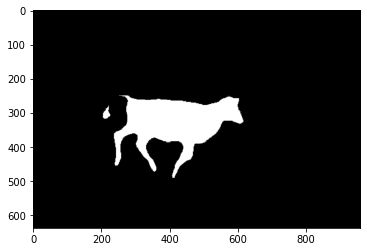

In [7]:
seg_map = np.all(output==seg_color_cow, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

# 이 seg_map이 마스크 검정색 부분은 0 흰색은 255

# 여기까지 한 거 캡쳐해놓은 사진 참고하기

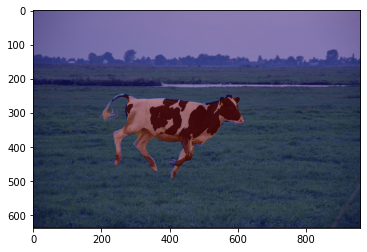

In [8]:
img_show = img_orig_cow.copy()
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

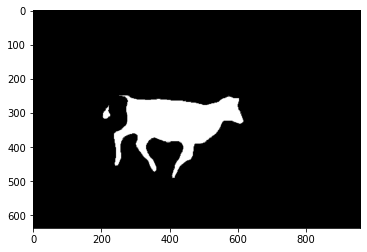

In [9]:
plt.imshow(cv2.cvtColor(img_mask, cv2.COLOR_BGR2RGB))
plt.show()

(360, 514, 3)


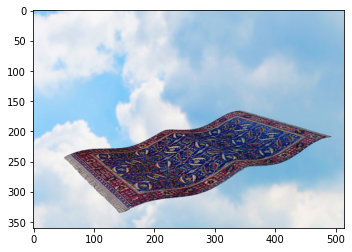

In [10]:
img_path_carpet = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_4_Portrait] images/10.jpg'  
img_orig_carpet = cv2.imread(img_path_carpet) 

print(img_orig_carpet.shape)

plt.imshow(cv2.cvtColor(img_orig_carpet, cv2.COLOR_BGR2RGB))
plt.show()

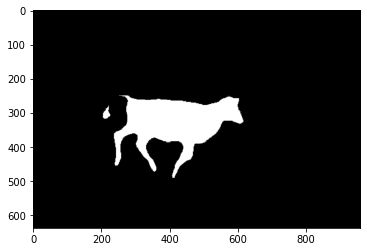

In [11]:
plt.imshow(seg_map, cmap='gray')
plt.show()

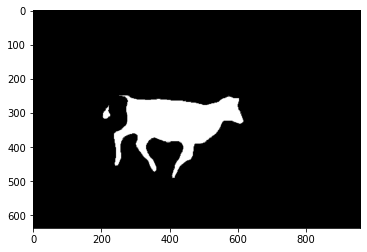

In [12]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

plt.imshow(img_mask_color)
plt.show()

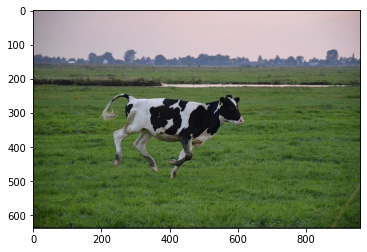

In [13]:
plt.imshow(cv2.cvtColor(img_orig_cow, cv2.COLOR_BGR2RGB))
plt.show()

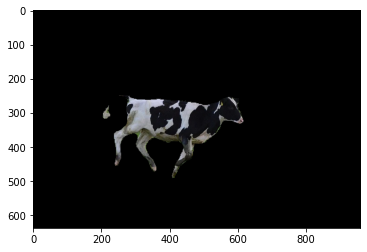

In [14]:
# 반전하지 않고 bitwise_and를 사용함
img_bg_only_cow = cv2.bitwise_and(img_orig_cow, img_mask_color)
plt.imshow(cv2.cvtColor(img_bg_only_cow, cv2.COLOR_BGR2RGB))
plt.show()

# 오..... 대박! 소만 나왔어!!!!!!ㅋㅋㅋㅋㅋㅋㅋㅋ

In [17]:
img_concat = np.where(img_mask_color==255, img_orig_carpet, img_bg_only_cow)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

ValueError: operands could not be broadcast together with shapes (638,960,3) (360,514,3) (638,960,3) 

In [15]:
img_orig_carpet.shape

(360, 514, 3)

In [16]:
img_bg_only_cow.shape

(638, 960, 3)

In [17]:
desired_shape = (638,960,3)

In [18]:
pad_height = desired_shape[0] - img_orig_carpet.shape[0]
pad_width = desired_shape[1] - img_orig_carpet.shape[1]

In [19]:
padded_image_carpet = np.pad(img_orig_carpet, ((0, pad_height), (0, pad_width), (0,0)), mode='constant')

In [20]:
padded_image_carpet.shape

(638, 960, 3)

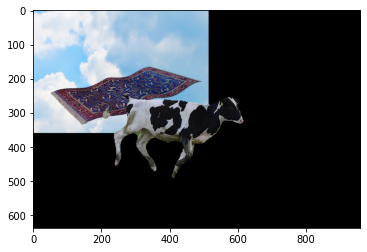

In [21]:
img_concat = np.where(img_mask_color==0, padded_image_carpet, img_bg_only_cow)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지에 패딩을 했더니 이미지 사이즈가 커지진 않았다ㅠ_ㅠ
# 다른 방법으로 도오전

In [23]:
from PIL import Image

# img_path_carpet = '/aiffel/project/first-repository/[GD_4_Portrait] images/10.jpg'
img_path_carpet = os.getenv('HOME')+'/aiffel/project/first-repository/[GD_4_Portrait] images/10.jpg'  
image = Image.open(img_path_carpet)

In [24]:
resized_image = image.resize((960,638)) # (638,960,3)이었는데 넣을 때 두 개의 숫자를 바꿈

resized_array = np.array(resized_image)

In [25]:
resized_array

array([[[133, 205, 255],
        [133, 205, 255],
        [132, 204, 254],
        ...,
        [172, 205, 224],
        [172, 205, 224],
        [172, 205, 224]],

       [[133, 204, 254],
        [133, 204, 254],
        [132, 204, 253],
        ...,
        [172, 205, 224],
        [172, 205, 224],
        [172, 205, 224]],

       [[133, 203, 252],
        [133, 203, 251],
        [132, 203, 249],
        ...,
        [172, 205, 224],
        [172, 205, 224],
        [172, 205, 224]],

       ...,

       [[231, 232, 236],
        [231, 232, 236],
        [231, 232, 236],
        ...,
        [232, 233, 235],
        [232, 233, 235],
        [232, 233, 235]],

       [[231, 232, 236],
        [231, 232, 236],
        [232, 233, 237],
        ...,
        [231, 232, 236],
        [231, 232, 236],
        [231, 232, 236]],

       [[231, 232, 236],
        [231, 232, 236],
        [232, 233, 237],
        ...,
        [231, 232, 236],
        [231, 232, 236],
        [231, 232, 236]]

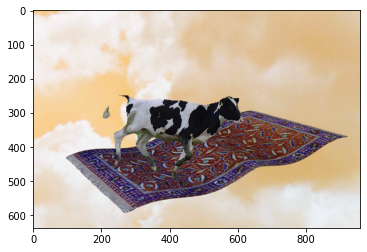

In [26]:
img_concat = np.where(img_mask_color==0, resized_array, img_bg_only_cow)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 대박ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 와우! 그런데 색은 왜 저렇게 나올까? 조정해야할까?
# 그렇다면 어떻게?

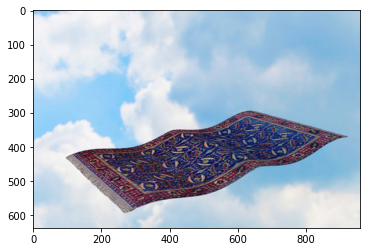

In [27]:
# img_mask_color = cv2.cvtColor(resized_array, cv2.COLOR_GRAY2BGR)

plt.imshow(resized_array)
plt.show()

In [28]:
img_mask_color = cv2.cvtColor(resized_array, cv2.COLOR_GRAY2BGR)

plt.imshow(resized_array)
plt.show()

error: OpenCV(4.5.3) /tmp/pip-req-build-agffqapq/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


# resized_array 이미지는 출력해보니 잘 나오는데.. 그리고 위 코드로 하니까 에러가 나네 

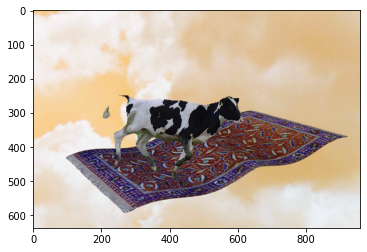

In [31]:
img_concat = np.where(img_mask_color==0, resized_array, img_bg_only_cow)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

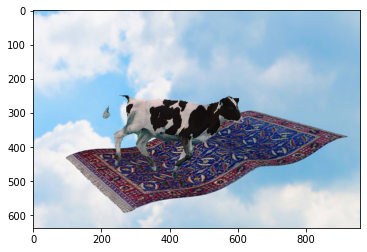

In [32]:
plt.imshow(img_concat)
plt.show()

# 아 굳이 cv2.cvtColor를 통해서 색을 바꾸어주지 않아도 되었었나보다

## Step 3. 사진에서 문제점 찾기

In [ ]:
추가로 여러분이 만들어 낸 인물 모드 사진 중 하나에서도 이상한 위치를 찾아 아래 사진처럼 표시해 봅시다. 
표시한 이미지들을 jupyter notebook에 포함하여 제출해 주세요.

In [ ]:
1. 4번째 사진 - 마네킹도 사람으로 인식한다
2. 5번째 사진에서 다리를 잘 세그멘테이션하지 못했다, 마네킹과 사람 모두 사람으로 분류함
3. 6번째 사진 - 마네킹의 얼굴만 일부 사람으로 세그멘테이션 함, 자세히 보면 마네킹 옆 옷만 걸려있는 부분도 일부 인식함
4. 7번째 사진 - 실제 사진과 그림을 둘다 소라고 인식함
5. 8, 9번째 사진 - 실제 소는 거의 제대로 인식했으나, 그림 소는 일부만 인식함
6. 1번째 사진 손 일부와 어깨 옷 일부가 인식되지 않음
7. 2번째 사진 - 가지고 있는 물건을 일부는 인식하고 일부는 인식하지 않음

## Step 4. 해결방법 제안하기

In [ ]:
생각해 볼 만한 주제를 아래에 몇 가지 제시해 봅니다. 아래를 읽어본 후, 여러분이 만든 인물모드 사진의 문제점을 해결할 방안을 정리하여 제안해 주시기 바랍니다.
단순히 'XXX 기술을 사용한다.' 정도의 선언적 솔루션이 아니라, 여러분들이 선택한 기술이 DeepLab 모델의 Semantic Segmentation 이 만들어 낸 Mask 영역에 어떻게 적용되어 문제점을 보완하게 되는지의 메커니즘이 포함된 솔루션이어야 합니다.

1.세그멘테이션의 한계
Semantic segmentation의 부정확성이 여러 가지 문제를 발생시키는 주요 원인입니다. 피사계심도를 이용한 보케(아웃포커싱) 효과는 말 그대로 심도를 표현하기 때문에 초점이 잡힌 거리를 광학적으로 아주 섬세하게 구별(segmentation) 하지만 이를 따라 한 semantic segmentation 모듈은 정확도가 1.00 이 되지 않는 한 완벽히 구현하기는 힘듭니다.

2.피사계 심도 이해하기
우선 피사계심도의 개념부터 명확히 이해해 봅시다.

아웃포커싱 하는 법
얕은 피사계 심도 촬영의 이해

3. 3D Camera 활용하기
이미지를 2D 방식으로 받아들이는 한계를 넘어 3D로 인식하려는 시도는 꽤 오래전부터 계속되어 왔습니다. 기술도 이제는 상당한 수준에 이르렀는데요. 크게는 스테레오 비전, ToF 방식 등이 자주 사용됩니다. 하드웨어 이미지 센서를 통한 3D 이미징 기술이 많이 발전되었는데요. 아래 참고 자료를 통해 최신 기술을 살펴봐도 좋습니다.

3D 이미지센서

4. 소프트웨어 기술 활용하기
하드웨어 개발과 생산에는 비용이 많이 들기 때문에 제한된 하드웨어를 이용하면서 소프트웨어로 그 한계를 극복하려는 노력도 많습니다. 구글의 struct2Depth가 대표적인 예일 것 같습니다.

딥러닝이 발전한 지금은 더 다양한 기술이 개발되어 있으니 잘 탐색해 보세요.

다른 기술과 융합해 보기
구글 pixel4에는 IR(적외선) 카메라가 달려있는데요. 물체의 온도를 측정하는 IR 카메라와 3D 이미지는 크게 관련이 없을 것 같지만, 이를 통해 보다 멋진 3d depth sensing이 가능하다는군요.

uDepth: Real-time 3D Depth Sensing on the Pixel 4
이렇게 카메라와 무관한 다른 기술과 융합하는 것도 좋은 해결책이 될 수 있습니다. 한 번 고민해 보세요!

In [ ]:
이 외에도 다른 방식으로 접근해도 좋습니다. 
엔지니어로서 본인이 선택한 솔루션을 잘 설명해 주세요. 

가능하다면 순서도(Flow Chart)를 활용하면 좋습니다.

# 2. 결론

1. 모델의 val_loss가 가장 낮은 것은 2.3581이다.
2. Trial 4(embedding_size = 512, hidden_size = 2048, epoch = 30, batch size=32)의 조건
3. generate_text 함수를 통해 모델이 만든 I love 로 시작하는 문장은 '<start> i love you , baby , that s nothing <end> '이다. 

# 3. 루브릭 관련 고려한 점

**1. 인물모드 사진을 성공적으로 제작하였다.**    
아웃포커싱 효과가 적용된 인물모드 사진과 동물 사진, 배경전환 크로마키사진을 각각 1장 이상 성공적으로 제작하였다. (그렇다ㅋㅋ)
 
 
**2. 제작한 인물모드 사진들에서 나타나는 문제점을 정확히 지적하였다.**     
인물사진에서 발생한 문제점을 정확히 지적한 사진을 제출하였다. 


**3. 인물모드 사진의 문제점을 개선할 수 있는 솔루션을 적절히 제시하였다.**     
semantic segmentation mask의 오류를 보완할 수 있는 좋은 솔루션을 이유와 함께 제시하였다.

# 4. 탐구 및 시도 모음

# 5. 회고

### 1. 프로젝트에서 어려웠던 점, 해결을 위해 시도한 방법, 문제해결에 성공한 이유 또는 실패한 이유

- **프로젝트에서 어려웠던 점**  
    NLP 프로세스를 이해하는 것(토크나이저 만들기, 공백/소문자/특수문자등 전처리하기)     
    Subclassing model로 훈련하기    
    파일 읽어올 때 사용하는 여러 함수들 ex. glob.glob
    

- **해결을 위해 시도한 방법**  
    1. 공식문서를 많이 찾아보고 정의와 예시들을 살펴봄
    2. subclassing 모델로 학습하면서는 hdf5 파일 형식으로 저장이 되지 않는다는 걸 앎. 동료 그루분이 tf로 저장하면 된다고 알려주셔 도움 받음


- **문제해결에 성공한 이유 또는 실패한 이유**  
    val_loss를 2.2 이하로 낮추라는 문제였는데, 쉽지 않았음

### 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

- **프로젝트를 진행하면서 알아낸 점**  
1. 데이터셋 객체를 만들 때 훈련용/검증용을 나누고 만들어야 한다는 것  

### 아직 모호한 점, 더 탐구해보고 싶은 부분    

# 6. References

np.all()   
https://numpy.org/doc/stable/reference/generated/numpy.all.html
https://nov19.tistory.com/106